In [1]:
# import packages
import numpy as np
from scipy import stats
from statsmodels.nonparametric.kde import KDEUnivariate
# dirty local imports:
import sys
sys.path.append("./../../../")
from share_code.utils import plt, sns, my_saving_display, make_huber
from joblib import Memory
import scipy as sp

# cachedir = './joblib_cache/'
# memory = Memory(cachedir=cachedir, verbose=1)

sns.set_palette("colorblind")

In [2]:
# to get images in the notebook
%matplotlib inline 

In [3]:
dirname = "../prebuiltimages/"
imageformat = ".pdf"  # should be .pdf or .png    
# some colors I'll use
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)
plt.close("all")
saving = False  # True

In [4]:
color_blind_list = sns.color_palette("GnBu_d", 8)
c1 = color_blind_list[0]
c2 = color_blind_list[1]
c3 = color_blind_list[2]

In [5]:
def gradient_descent(func, func_prime , step, theta_init = 3, n_iter=10):
    theta_list = [] 
    theta_list.append(theta_init)
    theta = theta_init

    for it in range(n_iter):
        theta = theta - step * func_prime(theta)
        theta_list.append(theta)
    return theta_list


def mm_visu(func, func_prime, theta, x, step):
    nabla = func_prime(theta)
    z = 1 / (2. * step) * (theta - step * nabla - x)**2 + func(theta) -  1/ 2. * step * nabla**2  
    return z


def min_gd(func, func_prime, theta, x, step):
    nabla = func_prime(theta)
    z =  func(theta) -  1/ 2. * step * nabla**2  
    return z

In [6]:
def my_plot(func, func_prime, x, theta_init, n_iter, step, saving):

    iterates_list = gradient_descent(
        func, func_prime,  step, theta_init=theta_init, n_iter=n_iter)
    ylims = [-2, 5]
    xlims = [-5, 5]
    mm = False,
    name = r'$\rho_\alpha$,'
    figname = "Huber_usual{:.1f}_step{:.1f}".format(alpha_huber, step).replace(".", "pt")

    fig1, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)
    ax.plot(x, func(x), c=c3, lw=1.7,
            label=name + r' $\alpha= {:.1f}$'.format(alpha_huber))
    ax.set_title(r"Gradient descent for Huber function; stepsize: $\alpha'={:.1f}$".format(step))
    if saving:
        my_saving_display(fig1, dirname, figname, imageformat)

    plt.legend(loc='lower left')

    myarray = np.asarray(iterates_list[:0 + 1])
    ax.plot(myarray, func(myarray), 'o')

    if saving:
        my_saving_display(fig1, dirname, figname + "_with_init", imageformat)

    plt.legend(loc='lower left')

    for index_to_plot in range(n_iter):
        fig1, ax = plt.subplots(figsize=(7, 7))
        ax.set_title(r"Gradient descent for Huber function; stepsize: $\alpha'={:.1f}$".format(step))
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_ylim(ylims[0], ylims[1])
        if mm:
            z = mm_visu(func, func_prime,
                        iterates_list[index_to_plot], x, step=step)
            # ax.plot(x, z, c=purple, lw=1.1, label=name + r' $\alpha= {:.1f}$'.format(alpha_huber))
            ax.plot(x, z, c='purple', lw=1.1,
                    label=r"$Q_{\frac{1}{\alpha'}}"+r"(\theta^{:1}, \cdot)$".format(index_to_plot))
            minima = min_gd(func, func_prime,
                            iterates_list[index_to_plot], x, step=step)
            ax.plot(iterates_list[index_to_plot + 1], minima, 'o', c='purple')

        ax.plot(x, func(x), c=c3, lw=1.7,
                label=name + r' $\alpha= {:.1f}$'.format(alpha_huber))
        myarray = np.asarray(iterates_list[:index_to_plot + 1])
        ax.plot(myarray, func(myarray), 'o')

        plt.legend(loc='lower left')
        if saving:
            my_saving_display(fig1, dirname, figname +
                              str(index_to_plot), imageformat)

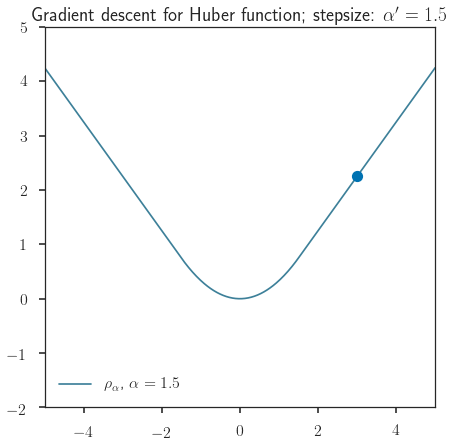

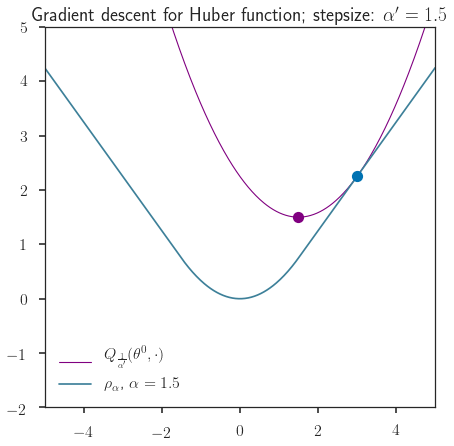

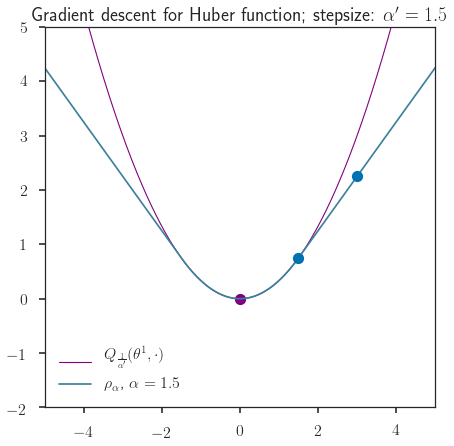

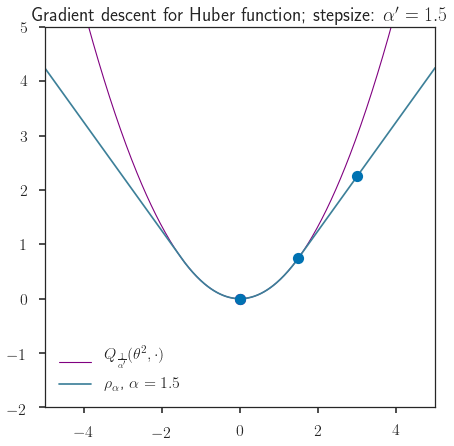

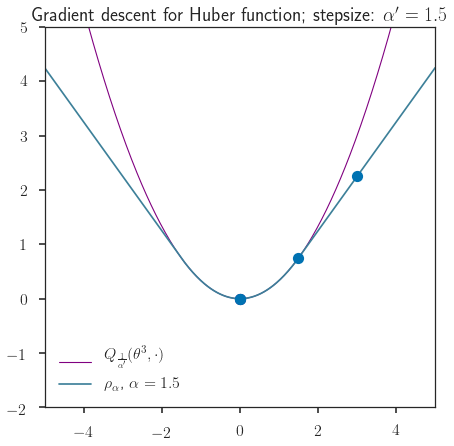

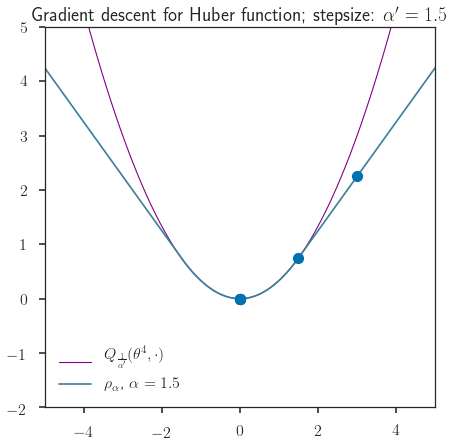

In [7]:
x = np.linspace(-5, 5, 500)

alpha_huber = 1.5
theta_init = 3
n_iter = 5
step = 1. * alpha_huber
func, func_prime = make_huber(alpha_huber)


my_plot(func, func_prime,x, theta_init,n_iter, step, saving)

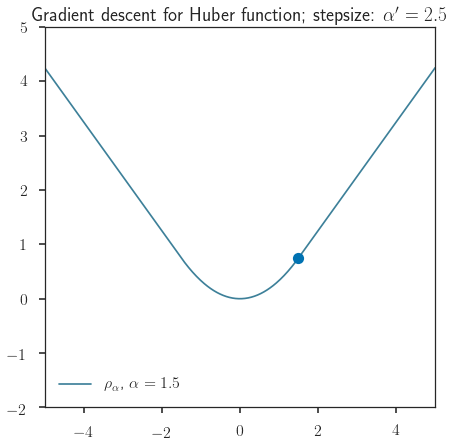

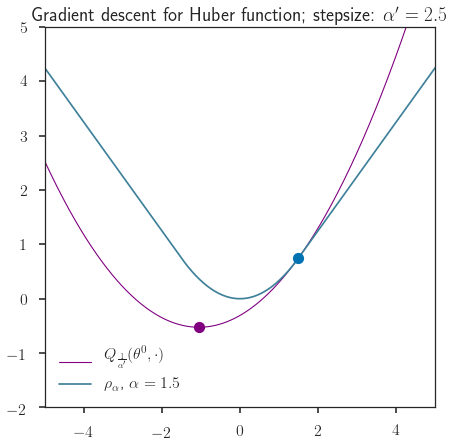

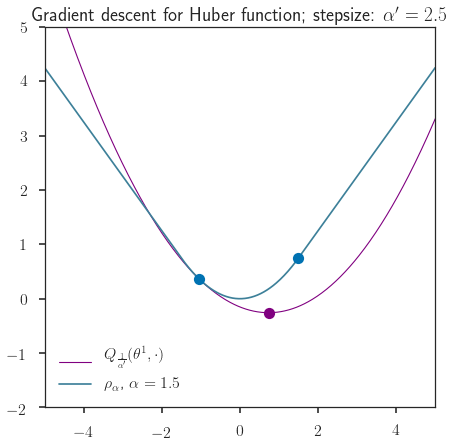

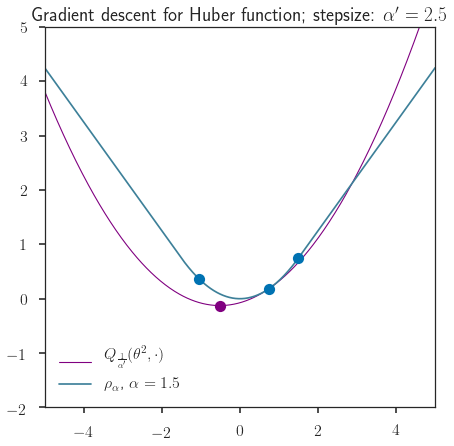

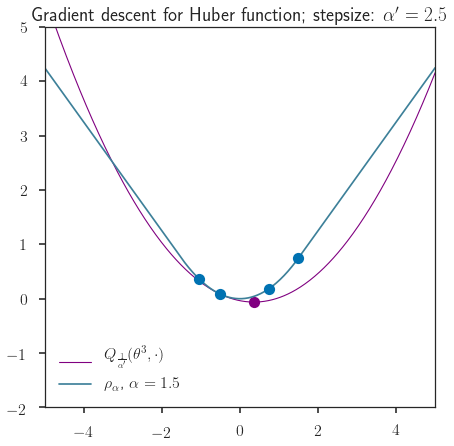

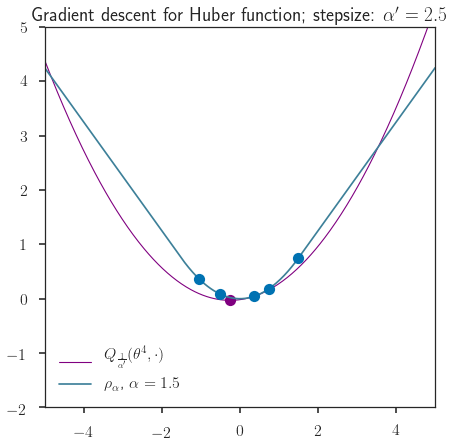

In [8]:
x = np.linspace(-5, 5, 500)
alpha_huber = 1.5
theta_init = 1.5
n_iter = 5
step = 1.7 * alpha_huber
func, func_prime = make_huber(alpha_huber)


my_plot(func, func_prime,x, theta_init,n_iter, step, saving)